# 1 iris Dataset

## 1.1 Summary Statistics

Compute and display summary statistics for each feature available in the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
names = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class']
data1 = pd.read_csv('iris.data', sep=',', header=None, names=names, engine='python')

Minimum value

In [3]:
data1.min()

sepalLength            4.3
sepalWidth             2.0
petalLength            1.0
petalWidth             0.1
class          Iris-setosa
dtype: object

Maximun value

In [4]:
data1.max()

sepalLength               7.9
sepalWidth                4.4
petalLength               6.9
petalWidth                2.5
class          Iris-virginica
dtype: object

Mean

In [5]:
data1.mean()

C:\Users\zxbBy\AppData\Local\Temp/ipykernel_56940/1540025681.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.mean()


sepalLength    5.843333
sepalWidth     3.054000
petalLength    3.758667
petalWidth     1.198667
dtype: float64

Range

In [6]:
for item in names[:4]:
    print(item + ":" + str(np.ptp(data1[item])))

sepalLength:3.6000000000000005
sepalWidth:2.4000000000000004
petalLength:5.9
petalWidth:2.4


Standard deviation

In [7]:
data1.std()

C:\Users\zxbBy\AppData\Local\Temp/ipykernel_56940/2587645652.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.std()


sepalLength    0.828066
sepalWidth     0.433594
petalLength    1.764420
petalWidth     0.763161
dtype: float64

Variance

In [8]:
data1.var(numeric_only=True)

sepalLength    0.685694
sepalWidth     0.188004
petalLength    3.113179
petalWidth     0.582414
dtype: float64

Count

In [9]:
data1.count()

sepalLength    150
sepalWidth     150
petalLength    150
petalWidth     150
class          150
dtype: int64

Percentiles

In [10]:
data1.quantile(q=0.25)

sepalLength    5.1
sepalWidth     2.8
petalLength    1.6
petalWidth     0.3
Name: 0.25, dtype: float64

In [11]:
data1.quantile(q=0.5)

sepalLength    5.80
sepalWidth     3.00
petalLength    4.35
petalWidth     1.30
Name: 0.5, dtype: float64

In [12]:
data1.quantile(q=0.75)

sepalLength    6.4
sepalWidth     3.3
petalLength    5.1
petalWidth     1.8
Name: 0.75, dtype: float64

Pandas series have a method called describe() that returns a nice summary of these basic statistics.

In [13]:
data1.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 1.2 Data Visualization

Histograms

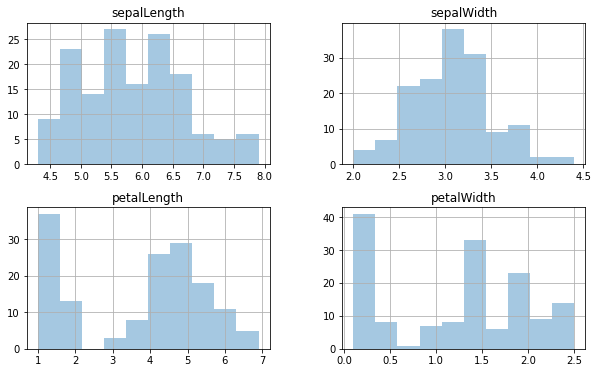

In [14]:
# combine all the histograms of features in one graph
datahist = data1.hist(alpha=0.4, figsize=(10,6))

Box Plots

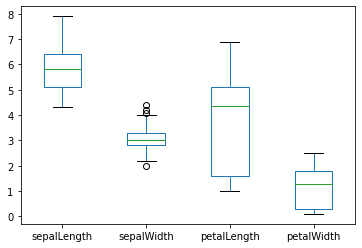

In [15]:
# all the boxplots which are for each feature in the dataset is presented in a single plot
boxplot = data1.boxplot(grid=False, return_type='both')

Pairwise Plot

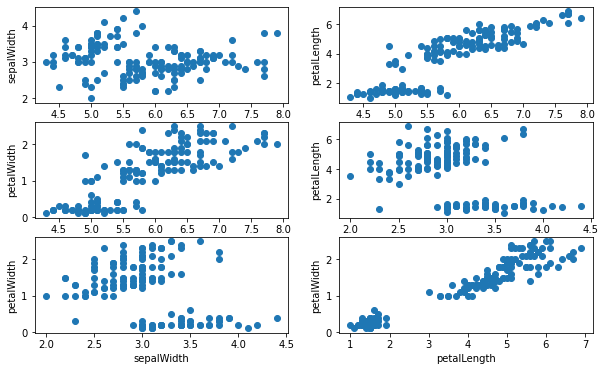

In [16]:
# a scatter plot for each pair of the feature is presented and there are 6 subplots
plt.figure(figsize=(10, 6))
i=1
for x in range(4):
    for y in range(x + 1, 4):
        plt.subplot(3, 2, i)
        i+=1
        plt.scatter(data1[names[x]], data1[names[y]])
        plt.xlabel(names[x])
        plt.ylabel(names[y])
plt.show()

Class-wise Visualization

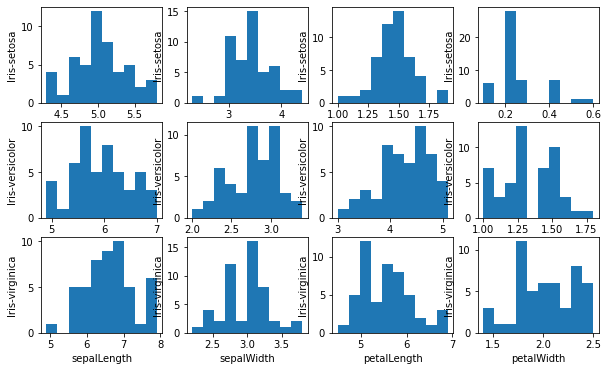

In [17]:
# combine the class-wise histograms in one graph
plt.figure(figsize=(10, 6))
i=1
for item in names[:4]:
    # for the first class at the next row
    plt.subplot(3,4,i)
    plt.hist(data1[data1['class']=="Iris-setosa"][item])
    plt.ylabel("Iris-setosa")
    plt.xlabel(item)
    # for the second class at the next row
    plt.subplot(3,4,i+4)
    plt.hist(data1[data1['class']=="Iris-versicolor"][item])
    plt.ylabel("Iris-versicolor")
    plt.xlabel(item)
    # for the last class at the next row
    plt.subplot(3,4,i+8)
    plt.hist(data1[data1['class']=="Iris-virginica"][item])
    plt.ylabel("Iris-virginica")
    plt.xlabel(item)
    i+=1
plt.show()

## 1.3 Conceptual Questions 

1. How many features are there? What are the Types of the features (e.g., numeric, nominal, discrete, continuous)?

    There are 4 features. They are all numeric and continuous features.

2. From the histograms of the whole data, how do the shapes of the histograms for petal length and petal width differ from those for sepal length and sepal width? Is there a particular value of petal length (which ranges from 1.0 to 6.9) where the distribution of petal lengths (as illustrated by the histogram) could be best segmented into two parts?

    Compared with the histograms of sepal length and sepal width, the histograms of petal length and petal width are higher at the edge and lower at the center.
    
    At about 2.5, pental lengths could be best segmented.

3. Based upon these boxplots, is there a pair of features that appear to have significantly different medians? Recall that the degree of overlap between variability is an important initial indicator of the likelihood that differences in means or medians are meaningful. Also, based solely upon the box plots, which feature appears to explain the greatest amount of the data?

    Based upon the boxplots, sepal length and petal width have significantly different medians.
    
    Based solely upon the box plots, petal length can explain the greatest amount of the data. Because it has the largest difference between 75% and 25% percentiles.

4. From the pairwise plots of the features, which features are most correlated from the plots? Mention at least three pairs.

    Sepal Length and sepal width, Sepal width and petal length, petal width and sepal length

5. Compare the histograms of each class to the histograms of the whole dataset. What differences do you see in the shapes?

    Except the histograms of petal length, the histograms of each class have similar shapes with that of the whole dataset's histograms, but more cliffy and less smooth.
    
    The petal length varies widely between classes, so they have totally different shapes. 

# 2 Air Quality Dataset

In [18]:
data2=pd.read_excel('AirQualityUCI.xlsx')

## 2.1 Summary Statistics

Minimum value

In [19]:
data2.min()

Date             2004-03-10 00:00:00
Time                        00:00:00
CO(GT)                        -200.0
PT08.S1(CO)                   -200.0
NMHC(GT)                        -200
C6H6(GT)                      -200.0
PT08.S2(NMHC)                 -200.0
NOx(GT)                       -200.0
PT08.S3(NOx)                  -200.0
NO2(GT)                       -200.0
PT08.S4(NO2)                  -200.0
PT08.S5(O3)                   -200.0
T                             -200.0
RH                            -200.0
AH                            -200.0
dtype: object

Maximun value

In [20]:
data2.max()

Date             2005-04-04 00:00:00
Time                        23:00:00
CO(GT)                          11.9
PT08.S1(CO)                  2039.75
NMHC(GT)                        1189
C6H6(GT)                   63.741476
PT08.S2(NMHC)                 2214.0
NOx(GT)                       1479.0
PT08.S3(NOx)                 2682.75
NO2(GT)                        339.7
PT08.S4(NO2)                  2775.0
PT08.S5(O3)                  2522.75
T                               44.6
RH                            88.725
AH                          2.231036
dtype: object

Mean

In [21]:
data2.mean()

C:\Users\zxbBy\AppData\Local\Temp/ipykernel_56940/3266061786.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data2.mean()
C:\Users\zxbBy\AppData\Local\Temp/ipykernel_56940/3266061786.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data2.mean()


CO(GT)            -34.207524
PT08.S1(CO)      1048.869652
NMHC(GT)         -159.090093
C6H6(GT)            1.865576
PT08.S2(NMHC)     894.475963
NOx(GT)           168.604200
PT08.S3(NOx)      794.872333
NO2(GT)            58.135898
PT08.S4(NO2)     1391.363266
PT08.S5(O3)       974.951534
T                   9.776600
RH                 39.483611
AH                 -6.837604
dtype: float64

Range

In [22]:
# the ptp function can not be used for the date type and time type
for item in data2.columns[2:]:
    print(item + str(np.ptp(data2[item])))


CO(GT)211.9
PT08.S1(CO)2239.75
NMHC(GT)1389
C6H6(GT)263.7414764482916
PT08.S2(NMHC)2414.0
NOx(GT)1679.0
PT08.S3(NOx)2882.75
NO2(GT)539.7
PT08.S4(NO2)2975.0
PT08.S5(O3)2722.75
T244.60000038147
RH288.72500038147
AH202.23103571558318


Standard deviation

In [23]:
data2.std()

C:\Users\zxbBy\AppData\Local\Temp/ipykernel_56940/3665097866.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data2.std()


Date             112 days 13:17:28.294221482
CO(GT)                              77.65717
PT08.S1(CO)                       329.817015
NMHC(GT)                          139.789093
C6H6(GT)                           41.380154
PT08.S2(NMHC)                     342.315902
NOx(GT)                           257.424561
PT08.S3(NOx)                      321.977031
NO2(GT)                           126.931428
PT08.S4(NO2)                      467.192382
PT08.S5(O3)                       456.922728
T                                  43.203438
RH                                 51.215645
AH                                  38.97667
dtype: object

Variance

In [24]:
data2.var()

C:\Users\zxbBy\AppData\Local\Temp/ipykernel_56940/3865177095.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data2.var()


CO(GT)             6030.636106
PT08.S1(CO)      108779.263095
NMHC(GT)          19540.990493
C6H6(GT)           1712.317143
PT08.S2(NMHC)    117180.176653
NOx(GT)           66267.404793
PT08.S3(NOx)     103669.208719
NO2(GT)           16111.587462
PT08.S4(NO2)     218268.721729
PT08.S5(O3)      208778.379165
T                  1866.537024
RH                 2623.042273
AH                 1519.180817
dtype: float64

Count

In [25]:
data2.count()

Date             9357
Time             9357
CO(GT)           9357
PT08.S1(CO)      9357
NMHC(GT)         9357
C6H6(GT)         9357
PT08.S2(NMHC)    9357
NOx(GT)          9357
PT08.S3(NOx)     9357
NO2(GT)          9357
PT08.S4(NO2)     9357
PT08.S5(O3)      9357
T                9357
RH               9357
AH               9357
dtype: int64

Percentiles

In [26]:
print(data2.quantile(q=0.25))

CO(GT)              0.600000
PT08.S1(CO)       921.000000
NMHC(GT)         -200.000000
C6H6(GT)            4.004958
PT08.S2(NMHC)     711.000000
NOx(GT)            50.000000
PT08.S3(NOx)      637.000000
NO2(GT)            53.000000
PT08.S4(NO2)     1184.750000
PT08.S5(O3)       699.750000
T                  10.950000
RH                 34.050000
AH                  0.692275
Name: 0.25, dtype: float64


In [27]:
print(data2.quantile(q=0.5))

CO(GT)              1.500000
PT08.S1(CO)      1052.500000
NMHC(GT)         -200.000000
C6H6(GT)            7.886653
PT08.S2(NMHC)     894.500000
NOx(GT)           141.000000
PT08.S3(NOx)      794.250000
NO2(GT)            96.000000
PT08.S4(NO2)     1445.500000
PT08.S5(O3)       942.000000
T                  17.200000
RH                 48.550000
AH                  0.976823
Name: 0.5, dtype: float64


In [28]:
print(data2.quantile(q=0.75))

CO(GT)              2.600000
PT08.S1(CO)      1221.250000
NMHC(GT)         -200.000000
C6H6(GT)           13.636091
PT08.S2(NMHC)    1104.750000
NOx(GT)           284.200000
PT08.S3(NOx)      960.250000
NO2(GT)           133.000000
PT08.S4(NO2)     1662.000000
PT08.S5(O3)      1255.250000
T                  24.075000
RH                 61.875000
AH                  1.296223
Name: 0.75, dtype: float64


Pandas series have a method called describe() that returns a nice summary of these basic statistics.

In [29]:
data2.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


## 2.2 Data Visualization

Historgrams

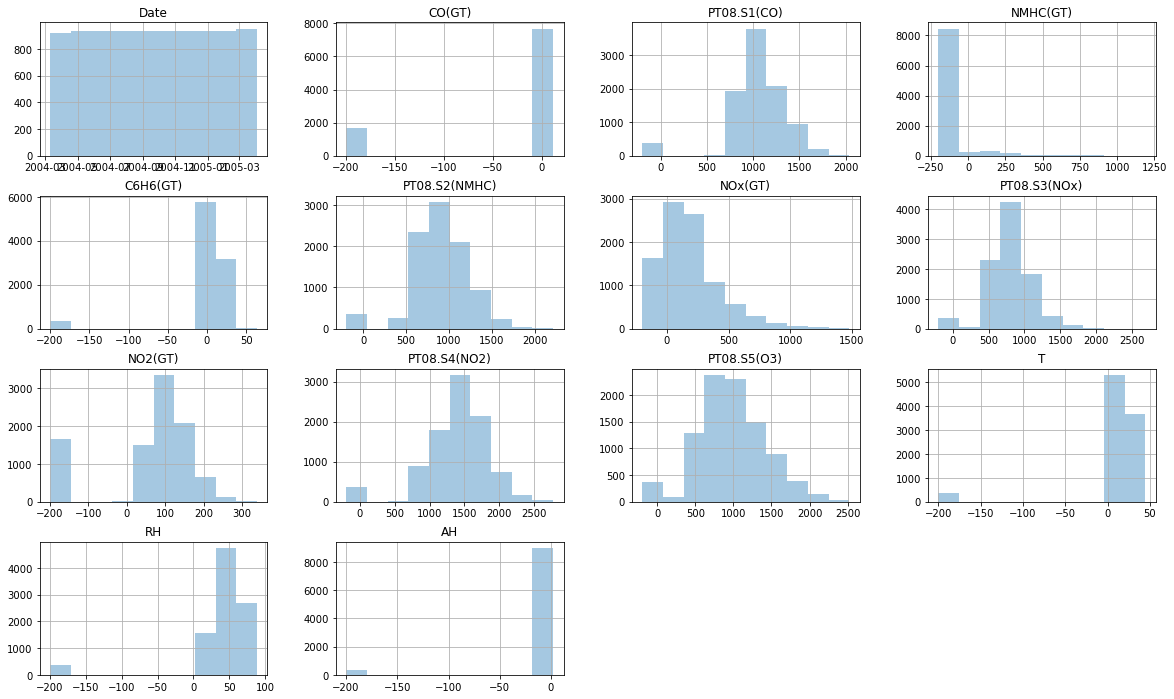

In [30]:
# Combine all the histograms of features in one graph
datahist = data2.hist(alpha=0.4, figsize=(20, 12))

Boxplots with outliers

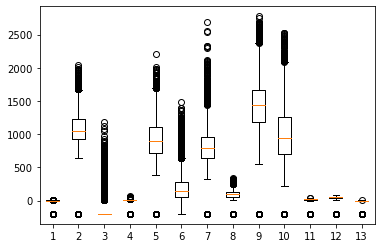

In [31]:
names2=data2.columns[2:]
plt.figure()
plt.boxplot([data2[names2[0]],data2[names2[1]],data2[names2[2]],data2[names2[3]],data2[names2[4]],data2[names2[5]],data2[names2[6]],data2[names2[7]],data2[names2[8]],data2[names2[9]],data2[names2[10]],data2[names2[11]],data2[names2[12]]])
plt.show()

Boxplots without outliers

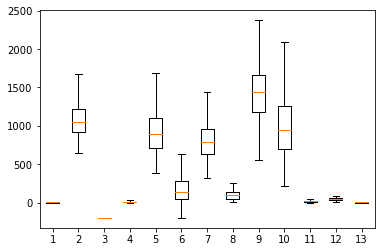

In [32]:
plt.figure()
plt.boxplot([data2[names2[0]],data2[names2[1]],data2[names2[2]],data2[names2[3]],data2[names2[4]],data2[names2[5]],data2[names2[6]],data2[names2[7]],data2[names2[8]],data2[names2[9]],data2[names2[10]],data2[names2[11]],data2[names2[12]]],showfliers=False)
plt.show()

## 2.3 Conceptual Questions 

1. From the histograms, what abnormality can you see?

    There are some histograms much higher than others. And we can see the distribution of some metrics are extremely gathered.

2. What abnormality can you see from the summary statistics?

    The variance and deviation are abnormally high for some metrics, for example: PT08.S4(NO2) and PT08.S5(O3).

3. How can you remove the abnormality from the data?

    We can remove the abnormality by using the box chart approach, We can think the data which exceeds the upper quartile by 1.5 times the distance and the lower quartile by 1.5 times the distance as outliers. And we will fill the outliers with the median.

4. Show how the histograms look after removing the abnormalities from the data?

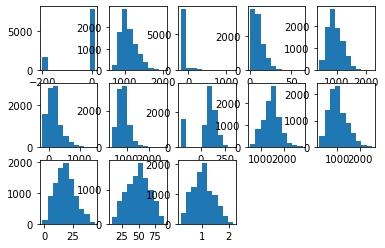

In [33]:

for each in data2.columns[2:]:
    a = data2[each].quantile(0.75)
    b = data2[each].quantile(0.25)

data2_remove = data2
data2_remove[(data2_remove[each]>=(a-b)*1.5+a)|(data2_remove[each]<=b-(a-b)*1.5)]=np.nan
data2_remove.fillna(data2_remove.median(numeric_only=True),inplace=True)

plt.figure()
idx=1
for each in data2_remove.columns[2:]:
    plt.subplot(3, 5, idx)
    plt.hist(data2_remove[each])
    idx+=1
plt.show()